In [1]:
import pysam
import pandas as pd
import pybedtools

In [4]:
vcf_file_path = "/data/private/pdutta/Collab_data/Oliver_data/New_data/background_boundaries.SpliceAI.vcf.gz"
vcf_file = pysam.VariantFile(vcf_file_path)

[E::idx_find_and_load] Could not retrieve index file for '/data/private/pdutta/Collab_data/Oliver_data/New_data/background_boundaries.SpliceAI.vcf.gz'


In [9]:
reference_file_path= "/data/projects/Resources/Gencode_genome_annotation/GRCh38.primary_assembly.genome.fa"
reference_fasta = pysam.FastaFile(reference_file_path)

In [10]:
# Lists to store the extracted data
chromosomes = []
positions = []
ref_alleles = []
alt_alleles = []

for rec in vcf_file.fetch():
    chromosomes.append(rec.chrom)
    positions.append(rec.pos)
    ref_alleles.append(rec.ref)
    alt_alleles.append(rec.alts)

# Create a DataFrame
df = pd.DataFrame({
    'Chromosome': chromosomes,
    'Position': positions,
    'Reference allele': ref_alleles,
    'Alternative alleles': alt_alleles
})

In [11]:
df

,Chromosome,Position,Reference allele,Alternative alleles
0,1,966575,G,"(C,)"
1,1,966576,G,"(A,)"
2,1,966577,G,"(T,)"
3,1,970292,G,"(T,)"
4,1,970390,C,"(T,)"
...,...,...,...,...
8108,22,39052085,G,"(A,)"
8109,22,39052305,C,"(T,)"
8110,22,39052309,G,"(A,)"
8111,22,39052323,G,"(A,)"


In [8]:
df['Chromosome'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '14', '15', '16', '17', '18', '19', '20', '21', '22'], dtype=object)

In [21]:
df['ref_all_len'] = df['Reference allele'].str.len()
df['alt_all_len'] = df['Alternative alleles'].str.len()

In [22]:
df

,Chromosome,Position,Reference allele,Alternative alleles,ref_all_len,alt_all_len
0,1,966575,G,"(C,)",1,1
1,1,966576,G,"(A,)",1,1
2,1,966577,G,"(T,)",1,1
3,1,970292,G,"(T,)",1,1
4,1,970390,C,"(T,)",1,1
...,...,...,...,...,...,...
8108,22,39052085,G,"(A,)",1,1
8109,22,39052305,C,"(T,)",1,1
8110,22,39052309,G,"(A,)",1,1
8111,22,39052323,G,"(A,)",1,1


In [35]:
df[df['ref_all_len']==36]

,Chromosome,Position,Reference allele,Alternative alleles,ref_all_len,alt_all_len
4780,11,72135924,CTCTGACTGTGGCTCTCTGGCAGGAATAGATGGACA,"(C,)",36,1


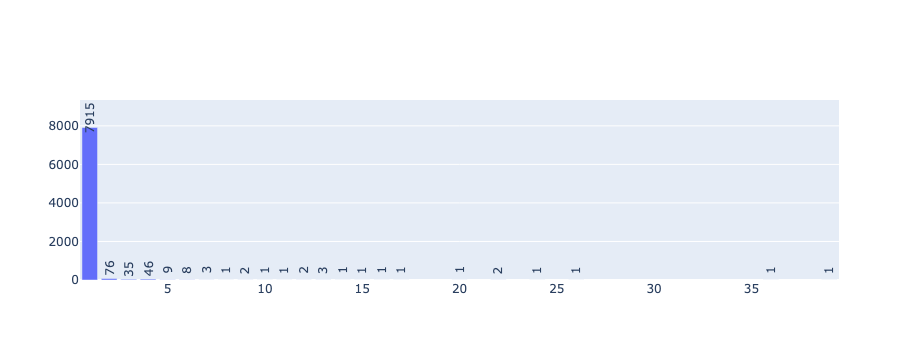

In [34]:
import plotly.graph_objects as go

# Count the frequency of each unique value
counts = df['ref_all_len'].value_counts()

# Sort counts by index (optional but can make the plot more readable)
counts = counts.sort_index()

# Create a bar chart (which visually is a histogram) using Plotly
fig = go.Figure(data=[go.Bar(
    x=counts.index,
    y=counts.values,
)])

# Add annotations with a vertical angle
for i in range(len(counts)):
    fig.add_annotation(
        x=counts.index[i],
        y=counts.values[i],
        text=str(counts.values[i]),
        showarrow=False,
        yshift=10,
        textangle=-90  # This will rotate the text vertically
    )

# Show the plot
fig.show()
